In [1]:
#cd /dls_sw/i16/software/python/userscripts/steve; module load python/anaconda; module load scisoftpy; jupyter notebook
import sys
sys.path.append('/dls_sw/apps/scisoftpy/2.7')
sys.path.append('/dls_sw/i16/software/python')
from dlstools.dataloader import pdnx
from dlstools import dataloader
%matplotlib inline
import matplotlib.pyplot as plt

=== Importing dlstools package


/dls_sw/apps/python/anaconda/1.7.0/64/envs/cctbx/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/dls_sw/apps/scisoftpy/2.7/scisoftpy/_external/tifffile.py:284: UserWarning: ImportError: No module named '_tifffile'. Loading of some compressed images will be very slow. Tifffile.c can be obtained at http://www.lfd.uci.edu/~gohlke/
  "ImportError: No module named '_tifffile'. "
Could not import plotting routines
No module named py4j.java_gateway


=== Need to obtain specfilewrapper.py and compatible specfile.so from ERSF PyMCA package in order to load spec files


In [2]:
p='/dls/i16/data/2017/cm16772-2/%i.nxs'

In [3]:
n=pdnx(p % 642326, scandata_field_list = ['/entry1/pil100k'])

/dls_sw/i16/software/python/dlstools/dataloader.py:60: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  setattr(self,'nx',_nx)


In [4]:
n

,TimeSec,count_time,delta,gamma,ic1monitor,kappa,maxval,maxx,maxy,mu,offsetdelta,path,phi,rc,sgome,sum,theta
0,328018.642655,0.5,0.0,88.874126,1388.542551,-135.237891,12.0,181.0,106.0,43.464,8.6,1.0,147.357,301.348358,0.012,-684.0,57.355507
1,328020.495284,0.5,0.0,88.874126,1388.570028,-135.237891,11.0,181.0,106.0,43.464,8.6,2.0,147.357,301.337097,0.013,-693.0,57.355507
2,328022.380557,0.5,0.0,88.874126,1388.292218,-135.237891,15.0,181.0,106.0,43.464,8.6,3.0,147.357,301.325378,0.014,-655.0,57.355507
3,328024.140904,0.5,0.0,88.874126,1388.270848,-135.237891,12.0,181.0,105.0,43.464,8.6,4.0,147.357,301.315460,0.015,-659.0,57.355507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,328085.718953,0.5,0.0,88.874126,1385.862128,-135.237891,60.0,183.0,104.0,43.464,8.6,38.0,147.357,300.853668,0.049,-587.0,57.355507
38,328087.472737,0.5,0.0,88.874126,1386.060567,-135.237891,57.0,183.0,104.0,43.464,8.6,39.0,147.357,300.841400,0.050,-591.0,57.355507
39,328089.237701,0.5,0.0,88.874126,1386.197944,-135.237891,39.0,183.0,104.0,43.464,8.6,40.0,147.357,300.828003,0.051,-617.0,57.355507
40,328091.007274,0.5,0.0,88.874126,1385.843814,-135.237891,32.0,183.0,104.0,43.464,8.6,41.0,147.357,300.816681,0.052,-649.0,57.355507


In [5]:
print n.scan

/dls/i16/data/2017/cm16772-2/642326.nxs
scan sgome 0.012 0.052000000000000005 0.001 pil100k 0.5


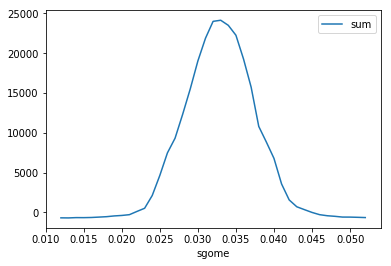

In [6]:
n.plot(x='sgome',y='sum')

In [7]:
print n.nx.tree

root:NXroot
  entry1:NXentry
    before_scan:NXcollection
      beamline_slits:NXcollection
        s1xcentre = 2.6635
        s1xgap = 0.177
        s1ycentre = -0.15
        s1ygap = 0.948
        s2xcentre = 0.29921875
        s2xgap = 19.9999125
        s2ycentre = -0.38025
        s2ygap = 22.0025
        s3xcentre = 2.4125
        s3xgap = 30.0
        s3ycentre = -0.00025
        s3ygap = 27.1045
        s4xcentre = -5.98925
        s4xgap = 35.0229
        s4ycentre = 0.00325
        s4ygap = 24.0105
        shtr3x = 11.93
        shtr3y = 4.08
      delta_offset:NXcollection
        delta_offset = 0.0
      diffractometer_sample:NXcollection
        azih = 1.0
        azik = 1.0
        azil = 0.0
        beta = 3.68617546571
        chi = 90.2
        delta = 0.0
        delta_axis_offset = 8.6
        en = 6.5220004967
        eta = -3.5527136788e-14
        gam = 88.8741261597
        h = -2.68053430023
        k = 0.93873320495
        kphi = 147.357
        l = 1.76576669

In [8]:
n.nx.entry1.instrument.rc.rc

NXfield(array([301.34835815, 301.33709717, 301.32537842, ..., 300.84140015,
       300.82800293, 300.81668091]))

In [9]:
n.sgome/2

0     0.0060
1     0.0065
2     0.0070
3     0.0075
       ...  
37    0.0245
38    0.0250
39    0.0255
40    0.0260
Name: sgome, Length: 41, dtype: float64

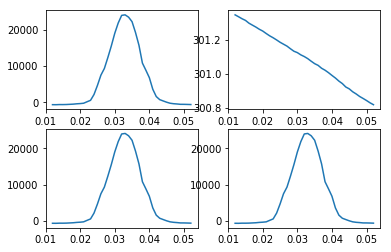

In [10]:
plt.figure(); 
plt.subplot(2,2,1); plt.plot(n.sgome, n['sum'])
plt.subplot(2,2,2); plt.plot(n.sgome, n.rc)
plt.subplot(2,2,3); plt.plot(n.sgome, n['sum'])
plt.subplot(2,2,4); plt.plot(n.sgome, n['sum'])